# Load data and pre-processing

In [74]:
###Setting environment
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import pickle
np.random.seed(123)
tf.random.set_seed(123)

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [75]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [76]:
# transform labels to categorical
(x_train_original, y_train_original), (x_test, y_test) = cifar100.load_data()
y_train_original = keras.utils.to_categorical(y_train_original, 100)
y_test = keras.utils.to_categorical(y_test, 100)


In [77]:
print(x_train_original.shape)
print(y_train_original.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


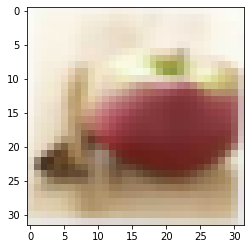

In [78]:
plt.imshow(x_train_original[2])

## split data

In [79]:
# split data into val and train
x_train, x_val, y_train, y_val = train_test_split(x_train_original, y_train_original, test_size = 0.1)

## Image augmentation

In [80]:
# define image augmentation
img_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,#width shift
    height_shift_range=0.2,
    horizontal_flip=True, 
)

img_gen.fit(x_train)

# Function to detect training

In [81]:
# plot the history to detect training
def plot_history(hist):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['loss'],
           label='loss')
    plt.plot(hist['val_loss'],
           label='val_loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot( hist['accuracy'],
           label = 'accuracy',color='red')
    plt.plot( hist['val_accuracy'],
           label = 'val_accuracy',color='green')
    plt.legend()

#  Structure of cnn

In [82]:
# a structure which is very similar to VGG16 but add 2 conv, 2 activation, 2 batch normalization, 2 pooling, 2 dropout layers,
# and change the final dropout from 0.5 to 0.3
weight_decay = 0.0005
nb_epoch=100
batch_size=20
#layer1
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), padding='same',strides=(1, 1),
input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#layer2
model.add(layers.Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='same'))

#layer3
model.add(layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

#layer4
model.add(layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#layer5
model.add(layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

#layer6
model.add(layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

#layer7
model.add(layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#layer8
model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

#layer9
model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

#layer10
model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#layer11
model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

#layer12
model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Extra to VGG16
# layer13
model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

# Extra to VGG16
# layer14

model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#layer15
model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

#layer16
model.add(layers.Flatten())
model.add(layers.Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

#layer17
model.add(layers.Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

#layer18
model.add(layers.Dropout(0.3)) # from 0.5 to 0.3 
model.add(layers.Dense(100,activation='softmax'))

model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 64)       

# Training

## 5 learning rate training steps

In [84]:
model_sgd_2 = model 
sgd = SGD(lr=0.03, decay = 0.0001, momentum=0.9, nesterov=True)
model_sgd_2.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
history2 = model_sgd_2.fit(img_gen.flow(x_train, y_train, batch_size = 16), epochs=50,
                 validation_data = (x_val, y_val), verbose=1)

model_sgd_2.save('group114_sgd_2.h5')

Epoch 1/50
2813/2813 [==============================] - 101s 36ms/step - loss: 57.4624 - accuracy: 0.0224 - val_loss: 29.2074 - val_accuracy: 0.0260
Epoch 2/50
2813/2813 [==============================] - 101s 36ms/step - loss: 17.9655 - accuracy: 0.0350 - val_loss: 12.2034 - val_accuracy: 0.0386
Epoch 3/50
2813/2813 [==============================] - 101s 36ms/step - loss: 8.8116 - accuracy: 0.0410 - val_loss: 7.4301 - val_accuracy: 0.0286
Epoch 4/50
2813/2813 [==============================] - 102s 36ms/step - loss: 6.0648 - accuracy: 0.0429 - val_loss: 5.3266 - val_accuracy: 0.0456
Epoch 5/50
2813/2813 [==============================] - 102s 36ms/step - loss: 5.0595 - accuracy: 0.0475 - val_loss: 4.7595 - val_accuracy: 0.0568
Epoch 6/50
2813/2813 [==============================] - 103s 37ms/step - loss: 4.6303 - accuracy: 0.0514 - val_loss: 4.3950 - val_accuracy: 0.0716
Epoch 7/50
2813/2813 [==============================] - 104s 37ms/step - loss: 4.4113 - accuracy: 0.0599 - val_los

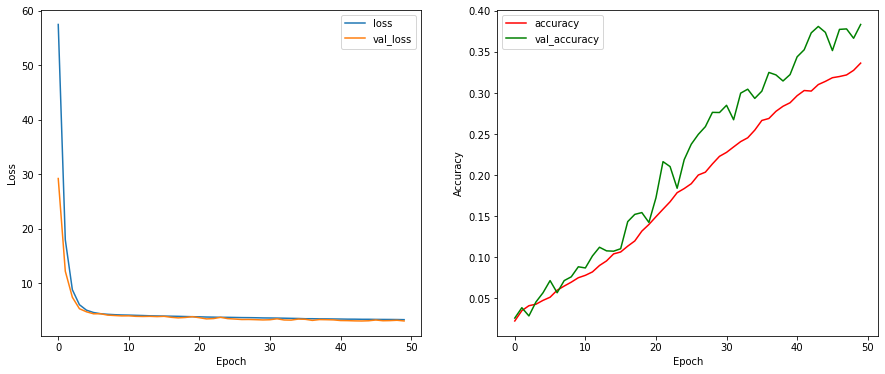

In [85]:
plot_history(history2.history)

In [86]:
model_sgd_3 = model_sgd_2
sgd = SGD(lr=0.005, decay = 0.00001, momentum=0.9, nesterov=True)
model_sgd_3.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
# 减少epochs 减少batchsize
history3 = model_sgd_3.fit(img_gen.flow(x_train, y_train, batch_size = 32), epochs=50,
                 validation_data = (x_val, y_val), verbose=1)
model_sgd_3.save('group114_sgd_3.h5')

Epoch 1/50
1407/1407 [==============================] - 65s 46ms/step - loss: 3.2442 - accuracy: 0.3513 - val_loss: 3.0722 - val_accuracy: 0.3984
Epoch 2/50
1407/1407 [==============================] - 65s 46ms/step - loss: 3.2555 - accuracy: 0.3545 - val_loss: 2.9853 - val_accuracy: 0.4024
Epoch 3/50
1407/1407 [==============================] - 65s 46ms/step - loss: 3.2355 - accuracy: 0.3586 - val_loss: 3.0580 - val_accuracy: 0.4094
Epoch 4/50
1407/1407 [==============================] - 65s 46ms/step - loss: 3.2447 - accuracy: 0.3640 - val_loss: 3.1396 - val_accuracy: 0.4026
Epoch 5/50
1407/1407 [==============================] - 65s 46ms/step - loss: 3.2279 - accuracy: 0.3688 - val_loss: 3.0443 - val_accuracy: 0.4192
Epoch 6/50
1407/1407 [==============================] - 65s 46ms/step - loss: 3.2109 - accuracy: 0.3736 - val_loss: 3.0287 - val_accuracy: 0.4202
Epoch 7/50
1407/1407 [==============================] - 65s 46ms/step - loss: 3.2066 - accuracy: 0.3779 - val_loss: 3.2149 -

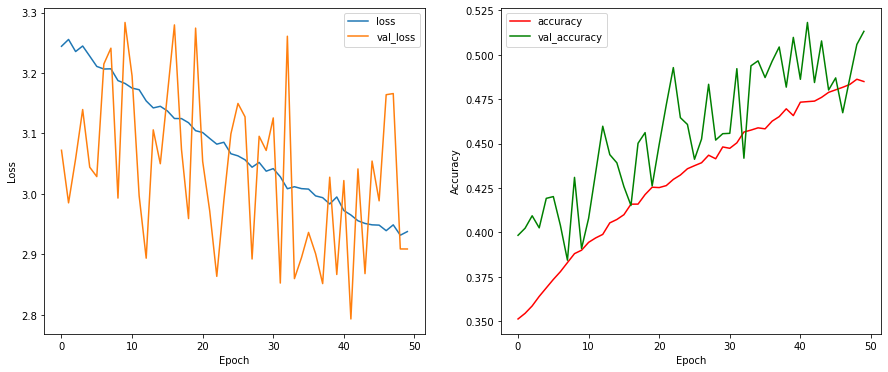

In [87]:
plot_history(history3.history)

In [88]:
model_sgd_4 = model_sgd_3
sgd = SGD(lr=0.0005, decay = 0.0000001, momentum=0.9, nesterov=True)
model_sgd_4.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
history4 = model_sgd_4.fit(img_gen.flow(x_train, y_train, batch_size = 64), epochs=50,
                 validation_data = (x_val, y_val), verbose=1)
model_sgd_4.save('group114_sgd_4.h5')

Epoch 1/50
704/704 [==============================] - 41s 58ms/step - loss: 2.6588 - accuracy: 0.5478 - val_loss: 2.6909 - val_accuracy: 0.5514
Epoch 2/50
704/704 [==============================] - 41s 59ms/step - loss: 2.5868 - accuracy: 0.5618 - val_loss: 2.6400 - val_accuracy: 0.5630
Epoch 3/50
704/704 [==============================] - 41s 58ms/step - loss: 2.5473 - accuracy: 0.5672 - val_loss: 2.5734 - val_accuracy: 0.5740
Epoch 4/50
704/704 [==============================] - 41s 58ms/step - loss: 2.5049 - accuracy: 0.5766 - val_loss: 2.5738 - val_accuracy: 0.5720
Epoch 5/50
704/704 [==============================] - 41s 58ms/step - loss: 2.4937 - accuracy: 0.5791 - val_loss: 2.5649 - val_accuracy: 0.5760
Epoch 6/50
704/704 [==============================] - 41s 58ms/step - loss: 2.4689 - accuracy: 0.5821 - val_loss: 2.5976 - val_accuracy: 0.5704
Epoch 7/50
704/704 [==============================] - 41s 58ms/step - loss: 2.4462 - accuracy: 0.5862 - val_loss: 2.5424 - val_accuracy:

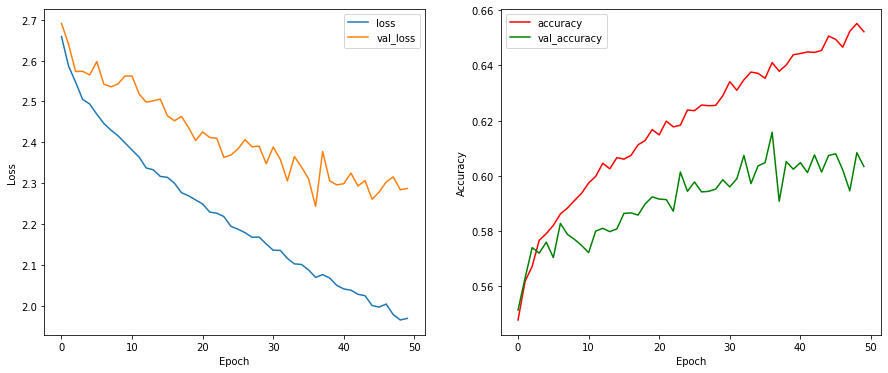

In [89]:
plot_history(history4.history)

In [90]:
model_sgd_5 = model_sgd_4
sgd = SGD(lr=0.00005, decay = 0.00000001, momentum=0.9, nesterov=True)
model_sgd_5.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
history5 = model_sgd_5.fit(img_gen.flow(x_train, y_train, batch_size = 128), epochs=50,
                 validation_data = (x_val, y_val), verbose=1)
model_sgd_5.save('group114_sgd_5.h5')

Epoch 1/50
352/352 [==============================] - 33s 93ms/step - loss: 1.8899 - accuracy: 0.6696 - val_loss: 2.2599 - val_accuracy: 0.6066
Epoch 2/50
352/352 [==============================] - 31s 87ms/step - loss: 1.8842 - accuracy: 0.6727 - val_loss: 2.2499 - val_accuracy: 0.6078
Epoch 3/50
352/352 [==============================] - 31s 88ms/step - loss: 1.8781 - accuracy: 0.6716 - val_loss: 2.2439 - val_accuracy: 0.6082
Epoch 4/50
352/352 [==============================] - 31s 88ms/step - loss: 1.8644 - accuracy: 0.6789 - val_loss: 2.2328 - val_accuracy: 0.6110
Epoch 5/50
352/352 [==============================] - 31s 88ms/step - loss: 1.8816 - accuracy: 0.6733 - val_loss: 2.2357 - val_accuracy: 0.6114
Epoch 6/50
352/352 [==============================] - 31s 88ms/step - loss: 1.8730 - accuracy: 0.6758 - val_loss: 2.2421 - val_accuracy: 0.6098
Epoch 7/50
352/352 [==============================] - 31s 88ms/step - loss: 1.8626 - accuracy: 0.6780 - val_loss: 2.2297 - val_accuracy:

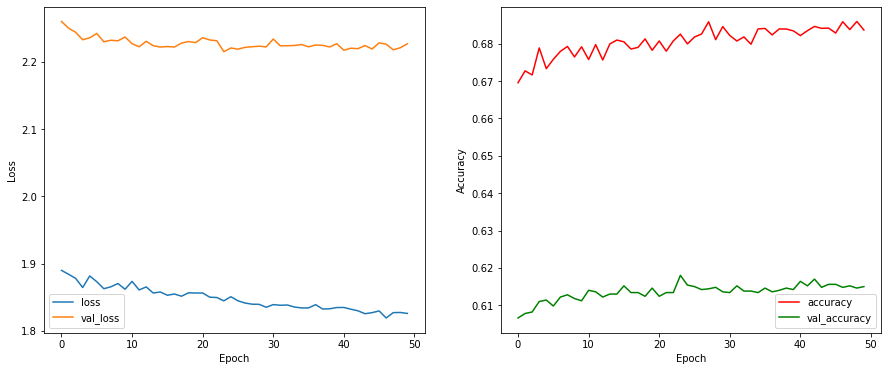

In [91]:
plot_history(history5.history)

In [92]:
model_sgd_6 = model_sgd_5
sgd = SGD(lr=0.000005, decay = 0.00000001, momentum=0.9, nesterov=True)
model_sgd_6.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
history6 = model_sgd_6.fit(img_gen.flow(x_train, y_train, batch_size = 256), epochs=50,
                 validation_data = (x_val, y_val), verbose=1)

Epoch 1/50
176/176 [==============================] - 29s 166ms/step - loss: 1.7930 - accuracy: 0.6960 - val_loss: 2.2159 - val_accuracy: 0.6152
Epoch 2/50
176/176 [==============================] - 26s 148ms/step - loss: 1.7952 - accuracy: 0.6928 - val_loss: 2.2118 - val_accuracy: 0.6154
Epoch 3/50
176/176 [==============================] - 26s 149ms/step - loss: 1.7932 - accuracy: 0.6925 - val_loss: 2.2170 - val_accuracy: 0.6154
Epoch 4/50
176/176 [==============================] - 26s 149ms/step - loss: 1.7906 - accuracy: 0.6920 - val_loss: 2.2133 - val_accuracy: 0.6152
Epoch 5/50
176/176 [==============================] - 26s 148ms/step - loss: 1.7991 - accuracy: 0.6931 - val_loss: 2.2126 - val_accuracy: 0.6150
Epoch 6/50
176/176 [==============================] - 26s 148ms/step - loss: 1.7967 - accuracy: 0.6920 - val_loss: 2.2130 - val_accuracy: 0.6152
Epoch 7/50
176/176 [==============================] - 26s 150ms/step - loss: 1.7947 - accuracy: 0.6918 - val_loss: 2.2136 - val_ac

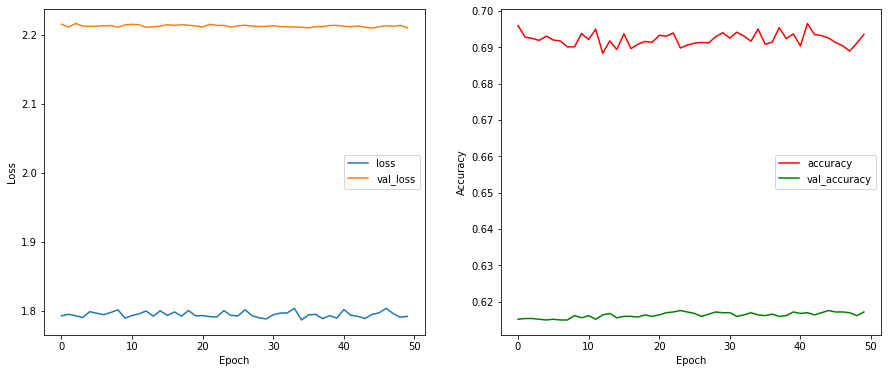

In [93]:
plot_history(history6.history)

## Save model

In [107]:
model_sgd_6.save('group114_pretrained_model.h5')

# Evaluation

In [108]:
model_load = keras.models.load_model('group114_pretrained_model.h5')

In [109]:
loss, accuracy = model_load.evaluate(x_test, y_test, batch_size=32, verbose=1, sample_weight=None)
print("accuracy_sgd:",acc)
print("loss_sgd",loss)

313/313 [==============================] - 3s 10ms/step - loss: 2.1907 - accuracy: 0.6236
accuracy_sgd: 0.6229000091552734
loss_sgd 2.1907074451446533


In [110]:
pred_cnn = model_load.predict(x_test)

In [111]:
# Transform prob to one-hot
for i in range(len(pred_cnn)):
    max_value = max(pred_cnn[i])
    for j in range(len(pred_cnn[i])):
        if max_value == pred_cnn[i][j]:
            pred_cnn[i][j] = 1
        else:
            pred_cnn[i][j] = 0

In [112]:
from sklearn.metrics import classification_report
eval_cnn = classification_report(y_test, pred_cnn,output_dict = True)

In [113]:
print("CNN version evaluation: ")
print("\nAccuracy: " + str(acc))
print("\nPrecision: "+ str(eval_cnn["macro avg"]["precision"]))
print("\nRecall: "+ str(eval_cnn["macro avg"]["recall"]))

CNN version evaluation: 

Accuracy: 0.6229000091552734

Precision: 0.6410205738913081

Recall: 0.6236


In [114]:
# Transform one-hot to 0~100 numbers
from tensorflow.keras.utils import to_categorical

y_test_num = [np.argmax(i) for i in y_test]
pred_cnn_num = [np.argmax(i) for i in pred_cnn]

In [115]:
print("Before \n------------------------------------------------------------\n" + str(y_test[0:5]))
print("\nNow \n------------------------------------------------------------\n" + str(y_test_num[0:5]))

Before 
------------------------------------------------------------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.

In [116]:
print("Before \n------------------------------------------------------------\n" + str(pred_cnn[0:5]))
print("\nNow \n------------------------------------------------------------\n" + str(pred_cnn_num[0:5]))

Before 
------------------------------------------------------------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.

In [117]:
from sklearn.metrics import confusion_matrix

cm_cnn = confusion_matrix(y_test_num, pred_cnn_num)

Text(0, 0.5, 'True labels')

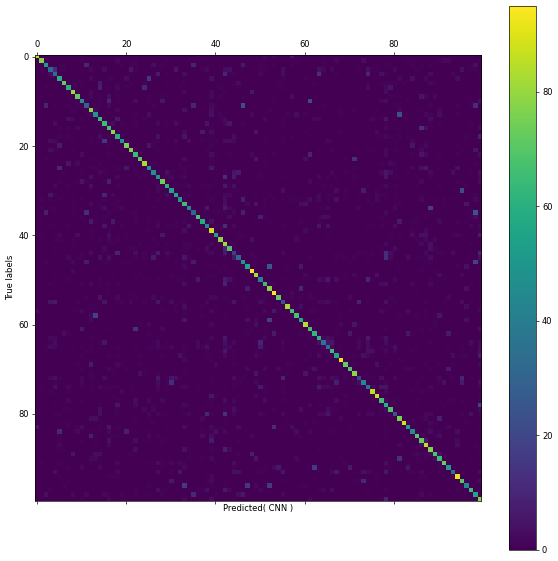

In [118]:
fig = plt.figure(figsize=(12, 12),dpi = 60)
plt.matshow(cm_cnn,fignum=0)
plt.colorbar()
plt.xlabel('Predicted( CNN )')
plt.ylabel('True labels')